In [38]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols, glm
import matplotlib.pyplot as plt

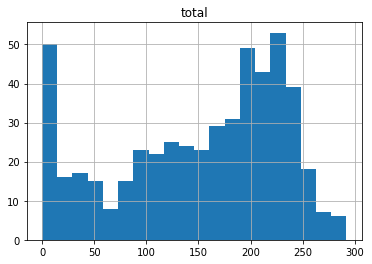

In [35]:
data = pd.read_csv('reduced_data.csv')
data['total'] = data['WT grand total'] + data['bw grand total']
data.hist('total', bins=20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20446a58>]],
      dtype=object)

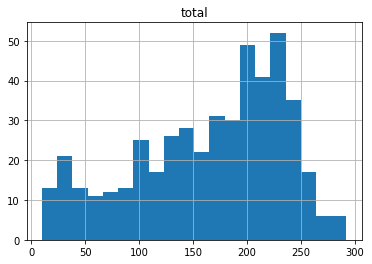

In [36]:
data = data[data['WT grand total'] > 9]
data.hist('total', bins=20)

In [118]:
data['k'] = data['WT grand total'] / (data['total']+1)
data['k_arcsin'] = np.vectorize(np.arcsin)(data['k'])

def sd_level(genotype):
    if genotype in ['A', 'B', 'C', 'J', 'K', 'L']:
        return 'SD72'
    if genotype in ['D', 'E', 'F', 'M', 'N', 'O']:
        return 'SD5'
    if genotype in ['G', 'H', 'I', 'P', 'Q', 'R']:
        return 'CyO'

def rsp_level(genotype):
    if genotype in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I' ]:
        return 'Rspss'
    if genotype in ['J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R']:
        return 'Rspi'

def ovd_level(genotype):
    if genotype in ['C', 'F', 'I', 'L', 'O', 'R']:
        return 'WT'
    if genotype in ['B', 'E', 'H', 'K', 'N', 'Q']:
        return 'het'
    if genotype in ['A', 'D', 'G', 'J', 'M', 'P']:
        return 'KO'

data['SD'] = np.vectorize(sd_level)(data['genotype'])
data['Rsp'] = np.vectorize(rsp_level)(data['genotype'])
data['Ovd'] = np.vectorize(ovd_level)(data['genotype'])
data.head()

,WT grand total,bw grand total,genotype,total,k,SD,Rsp,Ovd,k_arcsin
0,198,41,A,239,0.825000,SD72,Rspss,KO,0.970202
1,176,106,A,282,0.621908,SD72,Rspss,KO,0.671177
2,147,57,A,204,0.717073,SD72,Rspss,KO,0.799594
3,94,39,A,133,0.701493,SD72,Rspss,KO,0.777490
4,74,13,A,87,0.840909,SD72,Rspss,KO,0.998961


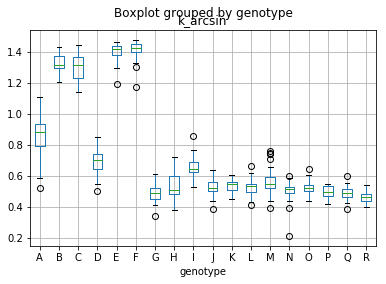

In [108]:
data.boxplot('k_arcsin', by='genotype')
plt.show()

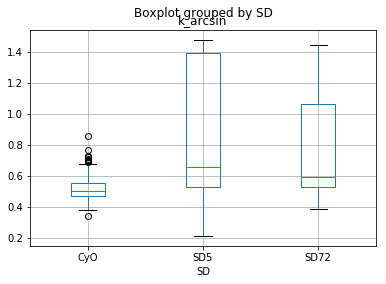

In [109]:
data.boxplot('k_arcsin', by='SD')
plt.show()

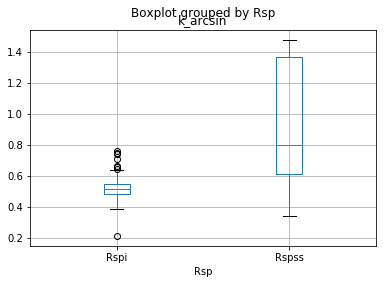

In [110]:
data.boxplot('k_arcsin', by='Rsp')
plt.show()

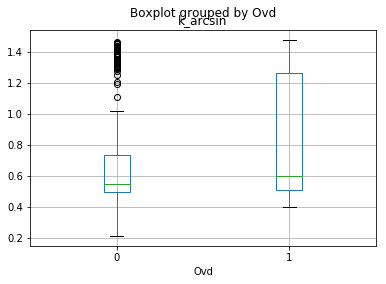

In [111]:
data.boxplot('k_arcsin', by='Ovd')
plt.show()

In [112]:
data5 = data[data['SD'] != 'SD72']
model = ols('k_arcsin ~ SD * Rsp * Ovd', data=data5).fit() # linear regression
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

               sum_sq     df           F        PR(>F)
SD           9.829466    1.0  359.289251  2.707163e-54
Rsp         11.255775    1.0  411.424084  1.871547e-59
SD:Rsp       6.603174    1.0  241.360964  5.583115e-41
Ovd          1.165630    1.0   42.606430  2.612278e-10
SD:Ovd       0.311391    1.0   11.382054  8.324048e-04
Rsp:Ovd      1.352232    1.0   49.427130  1.243496e-11
SD:Rsp:Ovd   0.173793    1.0    6.352544  1.220579e-02
Residual     8.781945  321.0         NaN           NaN


In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               k_arcsin   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          2.80e-100
Time:                        15:59:04   Log-Likelihood:                 129.21
No. Observations:                 329   AIC:                            -242.4
Df Residuals:                     321   BIC:                            -212.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4927      0.023     21.064      0.000       0.447       0.539
SD[T.SD5]                      0.0374      0.032      1.153      0.250      -0.026       0.101
Rsp[T.Rspss]                   0.0191      0.032      0.590      0.556      -0.045       0.083
SD[T.SD5]:Rsp[T.Rspss]         0.5018      0.045     11.153      0.000       0.413       0.590
Ovd                           -0.0313      0.041     -0.772      0.441      -0.111       0.048
SD[T.SD5]:Ovd                  0.0267      0.056      0.475      0.635      -0.084       0.137
Rsp[T.Rspss]:Ovd               0.1712      0.055      3.095      0.002       0.062       0.280
SD[T.SD5]:Rsp[T.Rspss]:Ovd     0.1945      0.077      2.520      0.012       0.043       0.346
==============================================================================
Omnibus:                       19.653   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.574
Skew:                          -0.132   Prob(JB):                     8.56e-13
Kurtosis:                       4.996   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
data72 = data[data['SD'] != 'SD5']
model = ols('k_arcsin ~ SD * Rsp * Ovd', data=data72).fit() # linear regression
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

              sum_sq     df           F        PR(>F)
SD          6.272682    1.0  516.256170  2.373867e-66
Rsp         7.145339    1.0  588.077853  9.819891e-72
SD:Rsp      4.629046    1.0  380.981126  9.265328e-55
Ovd         0.548545    1.0   45.146479  9.666621e-11
SD:Ovd      0.128880    1.0   10.607126  1.260253e-03
Rsp:Ovd     0.890357    1.0   73.278414  6.687551e-16
SD:Rsp:Ovd  0.068813    1.0    5.663460  1.796846e-02
Residual    3.523595  290.0         NaN           NaN


In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               k_arcsin   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.6
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          1.01e-110
Time:                        15:59:11   Log-Likelihood:                 238.36
No. Observations:                 298   AIC:                            -460.7
Df Residuals:                     290   BIC:                            -431.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.4927      0.016     31.608      0.000       0.462       0.523
SD[T.SD72]                      0.0402      0.022      1.805      0.072      -0.004       0.084
Rsp[T.Rspss]                    0.0191      0.022      0.885      0.377      -0.023       0.062
SD[T.SD72]:Rsp[T.Rspss]         0.4577      0.032     14.398      0.000       0.395       0.520
Ovd                            -0.0313      0.027     -1.158      0.248      -0.084       0.022
SD[T.SD72]:Ovd                  0.0264      0.037      0.706      0.481      -0.047       0.100
Rsp[T.Rspss]:Ovd                0.1712      0.037      4.645      0.000       0.099       0.244
SD[T.SD72]:Rsp[T.Rspss]:Ovd     0.1288      0.054      2.380      0.018       0.022       0.235
==============================================================================
Omnibus:                       44.556   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.295
Skew:                           0.329   Prob(JB):                     1.52e-63
Kurtosis:                       7.782   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
df = data72
mc = sm.stats.multicomp.MultiComparison(df['k_arcsin'], df['Ovd'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     0.0772  0.0129 0.1415  True 
-------------------------------------------


In [117]:
df = data5
mc = sm.stats.multicomp.MultiComparison(df['k_arcsin'], df['Ovd'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     0.124   0.0459 0.2021  True 
-------------------------------------------
